# understanding AUC and ROC on Model Evaluation 

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#### generate two class dataset


In [113]:
X,y = make_classification(n_samples=1000,n_classes=2,n_features=20,
                         random_state= 20)



X_train,X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3,
                                                 random_state= 27)

#### performing the dataset modeling

In [41]:
from sklearn.linear_model  import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


## logistic Regression 
model1= LogisticRegression()

model2= KNeighborsClassifier(n_neighbors= 4)

model3= DecisionTreeClassifier()

model4= GradientBoostingClassifier()

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


#### fit the model

In [42]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### make prediction

In [55]:
prediction1 = model1.predict(X_test)
prediction2 = model2.predict(X_test)
prediction3 = model3.predict(X_test)
prediction4 = model4.predict(X_test)


#### Training Score

In [59]:
### ;logistic regression

trainingscoreLog= model1.score(X_test,y_test)
"trainingscoreLog = 0.62" 
trainingscoreKN=  model2.score(X_test,y_test)
"trainingscoreKN = 0.70"
trainingscoreDT= model3.score(X_test,y_test)
"trainingscoreDT = 0.76"

trainingscoreGB= model4.score(X_test,y_test)
"trainingscoreGB = 0.825"

'trainingscoreGB = 0.825'

#### accuracy

#### importing the necessary library

In [64]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [68]:
print('Logistic regression accuracy',accuracy_score(y_test,prediction1))
print('KN regression accuracy',accuracy_score(y_test,prediction2))
print('DT regression accuracy',accuracy_score(y_test,prediction3))
print('GBOST regression accuracy',accuracy_score(y_test,prediction4))

Logistic regression accuracy 0.6175
KN regression accuracy 0.7
DT regression accuracy 0.7675
GBOST regression accuracy 0.825


#### Confussion matrix

In [70]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


#### model logisticregression Confusion matrix

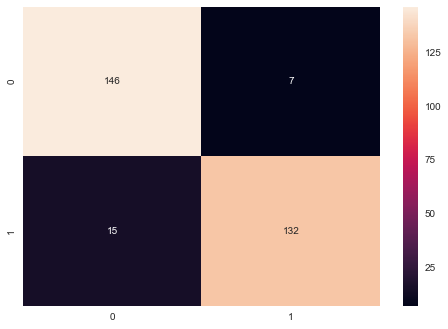

In [119]:
sns.heatmap(confusion_matrix(y_test,prediction1),annot=True,fmt='d')

### model KnearestNeighbour Confusion matrix

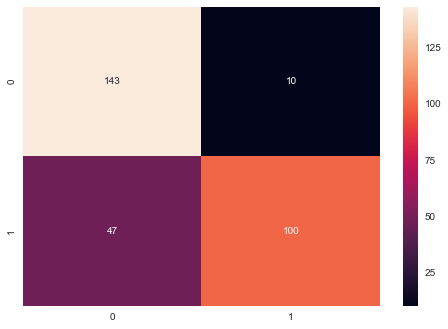

In [120]:
sns.heatmap(confusion_matrix(y_test,prediction2),annot=True,fmt='d')

#### confusion matrix for Decision Tree model

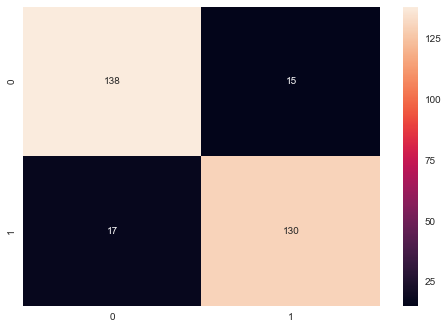

In [121]:
sns.heatmap(confusion_matrix(y_test,prediction3),annot=True,fmt='d')

### confusion matrix for the Gradient Boosting

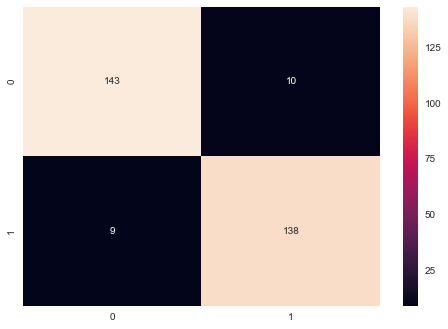

In [122]:
sns.heatmap(confusion_matrix(y_test,prediction4),annot=True,fmt='d')

In [123]:
print('            classification report for logistic regression')
print(classification_report(y_test,prediction1))
print('            classification report for Knearestneighbor')
print(classification_report(y_test,prediction2))
print('            classification report for Decision Tree')
print(classification_report(y_test,prediction3))
print('            classification report for Gradient Boosting')
print(classification_report(y_test,prediction4))

            classification report for logistic regression
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       153
          1       0.95      0.90      0.92       147

avg / total       0.93      0.93      0.93       300

            classification report for Knearestneighbor
             precision    recall  f1-score   support

          0       0.75      0.93      0.83       153
          1       0.91      0.68      0.78       147

avg / total       0.83      0.81      0.81       300

            classification report for Decision Tree
             precision    recall  f1-score   support

          0       0.89      0.90      0.90       153
          1       0.90      0.88      0.89       147

avg / total       0.89      0.89      0.89       300

            classification report for Gradient Boosting
             precision    recall  f1-score   support

          0       0.94      0.93      0.94       153
          1       0.93     

## ROC AUC SCORE

#### predict the probability 


In [124]:
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)

### ROC SCORE

Sklearn has a very potent method roc_curve() which computes the ROC for your classifier in a matter of seconds! It returns the FPR, TPR, and threshold values:



In [125]:

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#### plotting the ROC SCORE

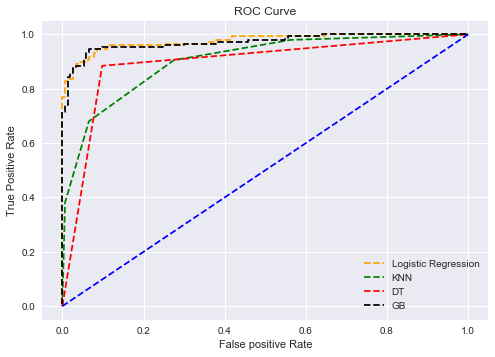

In [126]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='DT')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='GB')
plt.plot(p_fpr,p_tpr, linestyle= '--', color='blue',)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('ROC Curve')

plt.show()

### AUC SCORE

The AUC score can be computed using the roc_auc_score() method of sklearn:

In [128]:
from sklearn.metrics import roc_auc_score



auc_score1 = roc_auc_score(y_test,pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test,pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test,pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test,pred_prob4[:,1])

print(auc_score1)
print(auc_score2)
print(auc_score3)
print(auc_score4)

0.9758570094704548
0.9026054866391001
0.8931572629051622
0.9719887955182072


## Multiclass Classification 

In [39]:
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve

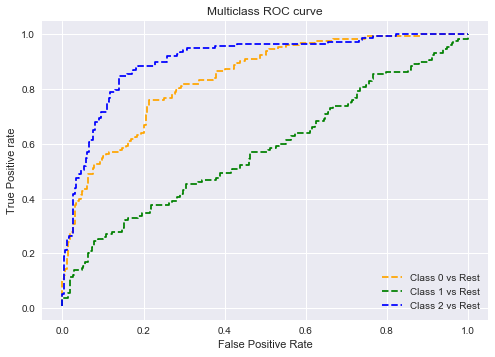

In [40]:


# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  